In [1]:
import numpy as np


In [2]:
class TreeNode(object):
    def __init__(self, feature_i=None, threshold=None, value=None, child=None):
        self.feature_i = feature_i
        self.threshold = threshold
        self.value = value
        self.child = child    

In [254]:
class DecisionTree(object):
    def __init__(self, max_depth=float("inf"), min_samples_split=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
    
    def fit(self, X, y):   
        self.dt = self._build_tree(X,y,0)
    
    def _build_tree(self, X, y, depth):
        m,n = X.shape
        label_value = np.unique(y)
        if len(label_value)==1:
            node = TreeNode(value=label_value[0])
            return node
        
        for k in label_value:
            if sum(y==k)/m>0.95:
                node = TreeNode(value=k)
                return node
        
        Gini_max = None
        if m>self.min_samples_split and depth<=self.max_depth:
            for i in range(n):
                feature_value = np.unique(X[:,i])
                for j in feature_value:
                    index_true = X[:,i]==j
                    index_false = X[:,i]!=j
                    
                    Gtrue = 1
                    Gfalse = 1
                    for k in label_value:
                        Gtrue -= (sum(y[index_true]==k)/m)**2
                        Gfalse -= (sum(y[index_false]==k)/m)**2    
                    Gini = sum(index_true)/m*Gtrue + sum(index_false)/m*Gfalse
                    
                    
                    '''
                    ptrue = sum(index_true)/m
                    pfalse = sum(index_false)/m
                    Gtrue = 0
                    Gfalse = 0
                    Hda = 0
                    Gini = 0
                    for k in label_value:
                        p = sum(y[index_true]==k)/m
                        if p>0: Gtrue += -ptrue*p*np.log2(p)
                        p = sum(y[index_false]==k)/m
                        if p>0: Gfalse += -pfalse*p*np.log2(p)
                        if p>0: p = sum(y==k)/m
                        Hda += -p*np.log2(p)
                    
                    if ptrue>0: Gini += -ptrue*np.log2(ptrue)
                    if pfalse>0: Gini += -pfalse*np.log2(pfalse)
                    Gini = - (Gtrue + Gfalse)
                    Gini /= Hda
                    #'''
                    
                    if Gini_max==None or Gini>Gini_max:
                        Gini_max=Gini
                        decision_feature_index = i
                        decision_feature_value = j
                        index_true_max = index_true.copy()
                        index_false_max = index_false.copy()

            node = TreeNode(feature_i=decision_feature_index, threshold=decision_feature_value)
            node.child = [self._build_tree(X[index_true_max, :], y[index_true_max], depth+1),
                          self._build_tree(X[index_false_max,:], y[index_false_max],depth+1) 
                         ]
            return node
        
        value = label_value[np.argmax([sum(y==yi) for yi in label_value])]
        node = TreeNode(value=value)
        return node
        
    def predict(self, X):
        return [self._predict(x) for x in X]
    
    def _predict(self, x):
        pt = self.dt
        while pt.value==None :
            if (x[pt.feature_i]==pt.threshold):
                pt = pt.child[0]
            else:
                pt = pt.child[1]
        return pt.value
    
        

In [255]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = datasets.load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [256]:
clf = DecisionTree()
clf.fit(X_train,y_train)

Accuracy: 0.633333333333


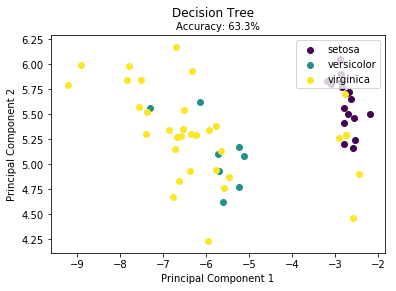

In [257]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy:", accuracy)

Plot().plot_in_2d(X_test, y_pred,
        title="Decision Tree",
        accuracy=accuracy,
legend_labels=data.target_names)

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [117]:
import numpy as np
import math
import sys


def calculate_entropy(y):
    """ Calculate the entropy of label array y """
    log2 = lambda x: math.log(x) / math.log(2)
    unique_labels = np.unique(y)
    entropy = 0
    for label in unique_labels:
        count = len(y[y == label])
        p = count / len(y)
        entropy += -p * log2(p)
    return entropy


def mean_squared_error(y_true, y_pred):
    """ Returns the mean squared error between y_true and y_pred """
    mse = np.mean(np.power(y_true - y_pred, 2))
    return mse


def calculate_variance(X):
    """ Return the variance of the features in dataset X """
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))
    
    return variance


def calculate_std_dev(X):
    """ Calculate the standard deviations of the features in dataset X """
    std_dev = np.sqrt(calculate_variance(X))
    return std_dev


def euclidean_distance(x1, x2):
    """ Calculates the l2 distance between two vectors """
    distance = 0
    # Squared distance between each coordinate
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return math.sqrt(distance)


def accuracy_score(y_true, y_pred):
    """ Compare y_true to y_pred and return the accuracy """
    accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
    return accuracy


def calculate_covariance_matrix(X, Y=None):
    """ Calculate the covariance matrix for the dataset X """
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)
 

def calculate_correlation_matrix(X, Y=None):
    """ Calculate the correlation matrix for the dataset X """
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance = (1 / n_samples) * (X - X.mean(0)).T.dot(Y - Y.mean(0))
    std_dev_X = np.expand_dims(calculate_std_dev(X), 1)
    std_dev_y = np.expand_dims(calculate_std_dev(Y), 1)
    correlation_matrix = np.divide(covariance, std_dev_X.dot(std_dev_y.T))

    return np.array(correlation_matrix, dtype=float)

In [119]:
import progressbar
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import numpy as np

#from utils.data_operation import calculate_covariance_matrix
#from utils.data_operation import calculate_correlation_matrix
#from utils.data_manipulation import standardize

bar_widgets = [
    'Training: ', progressbar.Percentage(), ' ', progressbar.Bar(marker="-", left="[", right="]"),
    ' ', progressbar.ETA()
]

class Plot():
    def __init__(self): 
        self.cmap = plt.get_cmap('viridis')

    def _transform(self, X, dim):
        covariance = calculate_covariance_matrix(X)
        eigenvalues, eigenvectors = np.linalg.eig(covariance)
        # Sort eigenvalues and eigenvector by largest eigenvalues
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:dim]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :dim]
        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed


    def plot_regression(self, lines, title, axis_labels=None, mse=None, scatter=None, legend={"type": "lines", "loc": "lower right"}):
        
        if scatter:
            scatter_plots = scatter_labels = []
            for s in scatter:
                scatter_plots += [plt.scatter(s["x"], s["y"], color=s["color"], s=s["size"])]
                scatter_labels += [s["label"]]
            scatter_plots = tuple(scatter_plots)
            scatter_labels = tuple(scatter_labels)

        for l in lines:
            li = plt.plot(l["x"], l["y"], color=s["color"], linewidth=l["width"], label=l["label"])

        if mse:
            plt.suptitle(title)
            plt.title("MSE: %.2f" % mse, fontsize=10)
        else:
            plt.title(title)

        if axis_labels:
            plt.xlabel(axis_labels["x"])
            plt.ylabel(axis_labels["y"])

        if legend["type"] == "lines":
            plt.legend(loc="lower_left")
        elif legend["type"] == "scatter" and scatter:
            plt.legend(scatter_plots, scatter_labels, loc=legend["loc"])

        plt.show()



    # Plot the dataset X and the corresponding labels y in 2D using PCA.
    def plot_in_2d(self, X, y=None, title=None, accuracy=None, legend_labels=None):
        X_transformed = self._transform(X, dim=2)
        x1 = X_transformed[:, 0]
        x2 = X_transformed[:, 1]
        class_distr = []

        y = np.array(y).astype(int)

        colors = [self.cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

        # Plot the different class distributions
        for i, l in enumerate(np.unique(y)):
            _x1 = x1[y == l]
            _x2 = x2[y == l]
            _y = y[y == l]
            class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

        # Plot legend
        if not legend_labels is None: 
            plt.legend(class_distr, legend_labels, loc=1)

        # Plot title
        if title:
            if accuracy:
                perc = 100 * accuracy
                plt.suptitle(title)
                plt.title("Accuracy: %.1f%%" % perc, fontsize=10)
            else:
                plt.title(title)

        # Axis labels
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')

        plt.show()

    # Plot the dataset X and the corresponding labels y in 3D using PCA.
    def plot_in_3d(self, X, y=None):
        X_transformed = self._transform(X, dim=3)
        x1 = X_transformed[:, 0]
        x2 = X_transformed[:, 1]
        x3 = X_transformed[:, 2]
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x1, x2, x3, c=y)
        plt.show()

In [260]:
import pandas as pd
data = pd.read_csv('../mytest/DTdata.txt', header=None, sep=' ')
y = data.values[:,0]
X = data.values[:,1:]
dt = DecisionTree(max_depth=5)
dt.fit(X,y)
print(data)
dt.predict(X)

      0         1     2       3       4
0    No     Sunny   Hot    High    Weak
1    No     Sunny   Hot    High  Strong
2   Yes  Overcast   Hot    High    Weak
3   Yes      Rain  Mild    High    Weak
4   Yes      Rain  Cool  Normal    Weak
5    No      Rain  Cool  Normal  Strong
6   Yes  Overcast  Cool  Normal  Strong
7    No     Sunny  Mild    High    Weak
8   Yes     Sunny  Cool  Normal    Weak
9   Yes      Rain  Mild  Normal    Weak
10  Yes     Sunny  Mild  Normal  Strong
11  Yes  Overcast  Mild    High  Strong
12  Yes  Overcast   Hot  Normal    Weak
13   No      Rain  Mild    High  Strong


['No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No']

In [261]:
def divide_on_feature(X, feature_i, threshold):
    """ Divide dataset based on if sample value on feature index is larger than
        the given threshold """
    split_func = None
    if isinstance(threshold, int) or isinstance(threshold, float):
        split_func = lambda sample: sample[feature_i] >= threshold
    else:
        split_func = lambda sample: sample[feature_i] == threshold

    X_1 = np.array([sample for sample in X if split_func(sample)])
    X_2 = np.array([sample for sample in X if not split_func(sample)])

    return np.array([X_1, X_2])

In [264]:
X = np.random.rand(5,4)
X

array([[ 0.88629285,  0.58684367,  0.76896984,  0.01091609],
       [ 0.36934096,  0.99104837,  0.81782578,  0.01572839],
       [ 0.03674477,  0.09621014,  0.90384535,  0.34295163],
       [ 0.44724526,  0.53444531,  0.19762916,  0.03429007],
       [ 0.19447305,  0.30688471,  0.50578547,  0.68663981]])

In [266]:
X1, X2 = divide_on_feature(X, 0, 0.2)

In [267]:
X1

array([[ 0.88629285,  0.58684367,  0.76896984,  0.01091609],
       [ 0.36934096,  0.99104837,  0.81782578,  0.01572839],
       [ 0.44724526,  0.53444531,  0.19762916,  0.03429007]])